# Name: Sparsh Karna
# Registration Number: 23BDS1172

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
features = ['Contract', 'tenure', 'MonthlyCharges', 'InternetService']
target = 'Churn'

df_selected = df[features + [target]].copy()
print(df_selected.info())
print(df_selected.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Contract         7043 non-null   object 
 1   tenure           7043 non-null   int64  
 2   MonthlyCharges   7043 non-null   float64
 3   InternetService  7043 non-null   object 
 4   Churn            7043 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 275.2+ KB
None
Contract           0
tenure             0
MonthlyCharges     0
InternetService    0
Churn              0
dtype: int64


In [4]:
le_contract = LabelEncoder()
le_internet = LabelEncoder()
le_churn = LabelEncoder()

df_selected['Contract'] = le_contract.fit_transform(df_selected['Contract'])
df_selected['InternetService'] = le_internet.fit_transform(df_selected['InternetService'])
df_selected['Churn'] = le_churn.fit_transform(df_selected['Churn'])

print(df_selected.head())

   Contract  tenure  MonthlyCharges  InternetService  Churn
0         0       1           29.85                0      0
1         1      34           56.95                0      0
2         0       2           53.85                0      1
3         1      45           42.30                0      0
4         0       2           70.70                1      1


In [5]:
X = df_selected[features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1172)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (4930, 4)
Test set size: (2113, 4)


In [6]:
model = Perceptron(random_state=1172)
model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_churn.classes_))

Accuracy: 0.7634

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.79      0.83      1556
         Yes       0.54      0.68      0.60       557

    accuracy                           0.76      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.79      0.76      0.77      2113



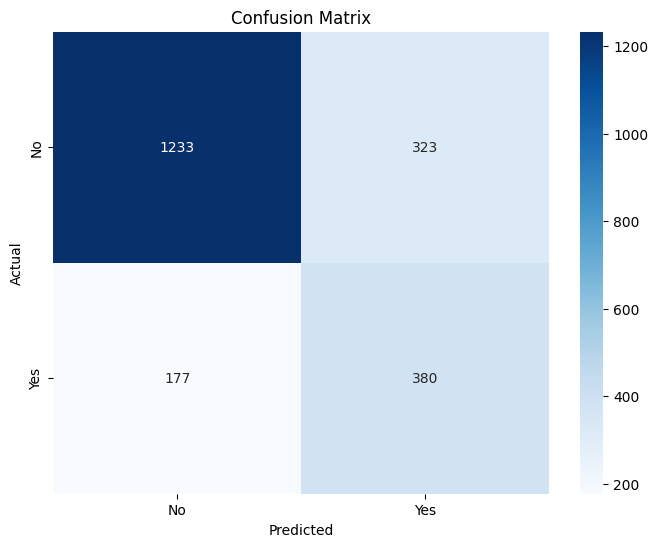

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_churn.classes_, yticklabels=le_churn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()